## Лабораторная работа 5.2

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [32]:
reviews = pd.read_csv("data/reviews_sample.csv")
reviews.rename( columns={'Unnamed: 0':'index'}, inplace=True )
recipes =  pd.read_csv("data/recipes_sample.csv", parse_dates=['submitted'])
reviews

,index,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [33]:
def regroup(case: int) -> str:
    if case < 5:
        return 'Короткий'
    elif 5 <= case < 50:
        return 'Средний'
    return 'Длинный'
        
recipes['group'] = recipes['minutes'].apply(regroup)
recipes['submitted'] = pd.to_datetime(recipes['submitted'])
reviews['date'] = pd.to_datetime(reviews['date'])
display(reviews.head())
recipes.head()


,index,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,group
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,Средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,Средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Средний


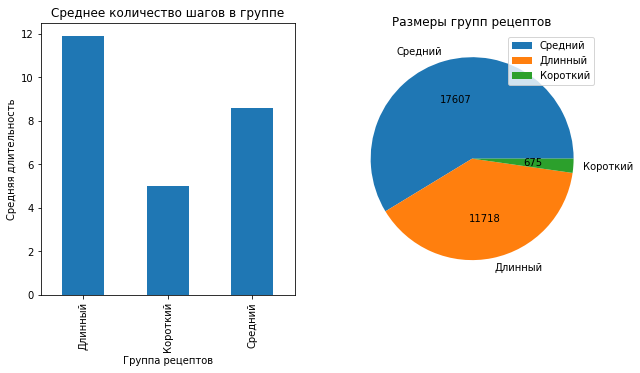

In [34]:
mean_steps = recipes.groupby('group')['n_steps'].mean()
group_size = recipes['group'].value_counts()

def autopct_format(values) -> str:
    def _amount_formatter(pct, total = sum(values)):
        val = int(round(pct * total / 100))
        return '{v:d}'.format(v=val)
    
    return _amount_formatter


fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

# PLOT 1
mean_steps.plot(
    ax      = ax[0], 
    kind    = 'bar', 
    title   = 'Среднее количество шагов в группе', 
    xlabel  = 'Группа рецептов', 
    ylabel  = 'Средняя длительность')
# PLOT 2
group_size.plot(
    ax      = ax[1], 
    kind    = 'pie', 
    labels  = group_size.index, 
    title   = 'Размеры групп рецептов', 
    ylabel  = '', 
    legend  = True,             
    autopct = autopct_format(group_size));

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

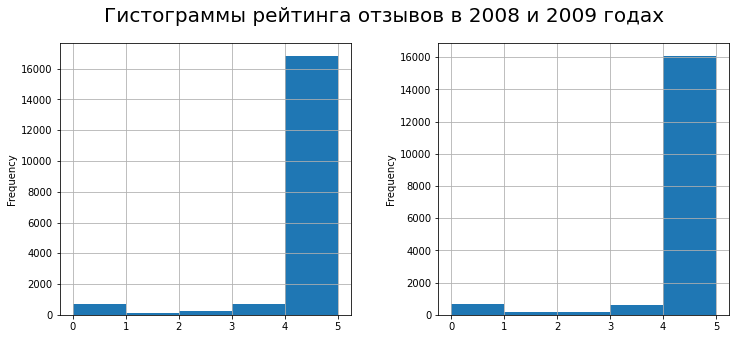

In [35]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews_sample = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]
reviews_sample['date'].dt.year.value_counts()

reviews_grouped = reviews_sample.groupby(reviews_sample['date'].dt.year)['rating']

fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=20)
plt.subplots_adjust(wspace=0.3)
reviews_grouped.get_group(2008).plot(kind='hist', ax=ax[0], grid=True, bins=5)
reviews_grouped.get_group(2009).plot(kind='hist', ax=ax[1], grid=True, bins=5);

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

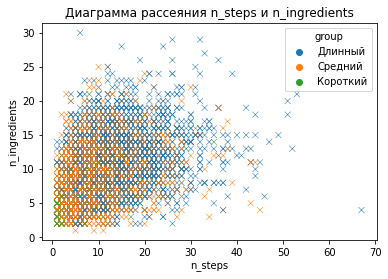

In [36]:
sns.scatterplot(data = recipes, x = 'n_steps', y = 'n_ingredients', marker='x', alpha=1, linewidth=0.5, hue = 'group')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel("n_steps")
plt.ylabel("n_ingredients")
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [37]:
result = pd.merge(
    recipes, reviews,
    how="outer",
    left_on='id',
    right_on='recipe_id'
    
)
result

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,group,index,user_id,recipe_id,date,rating,review
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинный,920960.0,743566.0,44123.0,2008-01-28,5.0,I lived in San Diego for 19 years and would g...
1,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинный,920958.0,76503.0,44123.0,2003-06-03,5.0,This soup is the Bomb! Don't hesitate to try.....
2,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинный,920957.0,34206.0,44123.0,2003-03-23,5.0,I just can't say enough about how wonderful th...
3,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Средний,897580.0,494084.0,67664.0,2012-09-26,5.0,These are great! I use 100% (organic) juice a...
4,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Средний,897579.0,303445.0,67664.0,2012-03-31,5.0,"Very, very good. My son loves these. He like..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128591,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинный,493812.0,305531.0,486161.0,2013-07-18,5.0,Delish! I made this as directed but used a smo...
128592,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинный,493330.0,1271506.0,486161.0,2012-09-10,5.0,Now the only substitution I made was African B...
128593,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинный,493813.0,724631.0,486161.0,2014-01-07,5.0,"Very tasty soup, moderate spiciness (even afte..."
128594,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинный,493811.0,133174.0,486161.0,2013-07-18,5.0,Very yummy indeed. A spicy sausage was used i...


In [38]:
correlation = result[["minutes", "n_steps", "n_ingredients", "rating"]].corr()
correlation

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.031139,-0.006100,-0.025770
n_steps,0.031139,1.000000,0.295298,-0.019057
n_ingredients,-0.006100,0.295298,1.000000,0.003405
rating,-0.025770,-0.019057,0.003405,1.000000


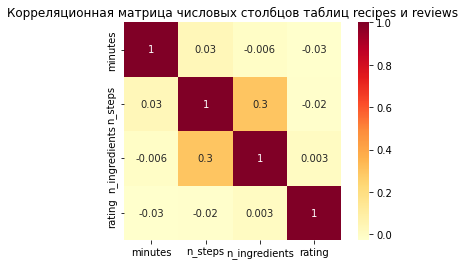

In [39]:
sns.heatmap(
    correlation, 
    annot=True, 
    fmt='.1g', 
    cmap='YlOrRd', 
    linecolor= 'black', 
    square=True
).set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews');